# contexto
No Airbnb, qualquer pessoa que tenha um quarto ou um imóvel de qualquer tipo, (apartamento, casa, chalé, pousada, etc.) pode ofertar o seu imóvel para ser alugado por diária.

Você cria o seu perfil de host (pessoa que disponibiliza um imóvel para aluguel por diária e e cria o anuncio do seu imóvel.

Nesse anúncio, o host deve descrever as caracteristicas do imóvel da forma mais completa possível, de forma a ajudar os locadores/viajantes a escolherem o melhor imóvel apra eles ( e de forma a tornar o seu anúncio mais atrativo)

Existem dezenas de personificações possíveis no seu anúncio, desde quantidade mínima de diária, preço, quantidade de quartos, até regras de cancelamento, taxas extras paras hóspedes extras, exigência de verificação de identidade do locador, etc.

Nosso Objetivo
Construir um modelo de prvisão de preço que permita uma pessoa comum que possui um imóvel, possa saber quanto deve cobrar pela diária do seu imovel.

Ou ainda, para o locador comum, dado o imóvel que ele está buscando, ajudar a saber se aquele imóvel está com preço atrativo (abaixo da média de imóveis com as mesmas caracteristicas) ou não.

o que temos disponíveis, inspirações e cretido
As bases de dados foram retiradas do site kaggle : link ...

As basese de dados são os preços dos imóveis obtidos e suas respectivas caracteristica em cada mês
Os preços são dados em reais (R$)
Temos bases de abril de 2018 a maio de 2020, com exceção de junho de 2018 que não possui base de dados.
Expectativas Iniciais
Acredito que a sazonalidade pode ser um fator importante, visto que meses como dezembro costumam ser bem caros no RJ
A localização do imóvel deve fazer muita diferença no prço, ja que no rio de janeiro a lcoalização pode mudar completamente as careacetisticas do lugar (segurança, beleza natual, pontos turísticos)
Adionais/Comodiades podem ter impactos significativos, visot que temos muitos prédios e casas antigas no Rio de Jeneiro
Vamos descobrir o quanto esses fatores impactam e se temos outros não tão intuitivos que são importantes.

# importação das Bibliotecas e Base de dados

In [71]:
import pandas as pd
import pathlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
caminho_bases = pathlib.Path(r'C:\Users\Samsung\Desktop\datasets\Airbnb-rio')

meses = {'jan': 1, 'fev': 2, 'mar': 3, 'abr': 4, 'mai': 5, 'jun': 6, 'jul': 7, 'ago': 8, 'set': 9, 'out': 10, 'nov': 11, 'dez': 12}

base_airbnb_df = []

try:
    for arquivo in caminho_bases.iterdir():
        nome_mes = arquivo.name[:3]
        mes = meses.get(nome_mes, None)
        
        ano = arquivo.name[-8:-4]
        ano = int(ano)
                 
        df = pd.read_csv(caminho_bases / arquivo.name, low_memory=False)
        df['ano'] = ano
        df['mes'] = mes

        base_airbnb_df.append(df)
        
    # Concatena todos os DataFrames armazenados na lista base_airbnb_df
    base_airbnb_df = pd.concat(base_airbnb_df, ignore_index=True)
            
except Exception as err:
    print(err)
else:
    print('Arquivo lido com sucesso')

display(base_airbnb_df)


Arquivo lido com sucesso


id                            listing_url       scrape_id  \
0          14063     https://www.airbnb.com/rooms/14063  20180414160018   
1          17878     https://www.airbnb.com/rooms/17878  20180414160018   
2          24480     https://www.airbnb.com/rooms/24480  20180414160018   
3          25026     https://www.airbnb.com/rooms/25026  20180414160018   
4          31560     https://www.airbnb.com/rooms/31560  20180414160018   
...          ...                                    ...             ...   
902205  38844730  https://www.airbnb.com/rooms/38844730  20190923212307   
902206  38846408  https://www.airbnb.com/rooms/38846408  20190923212307   
902207  38846703  https://www.airbnb.com/rooms/38846703  20190923212307   
902208  38847050  https://www.airbnb.com/rooms/38847050  20190923212307   
902209  38847655  https://www.airbnb.com/rooms/38847655  20190923212307   

       last_scraped                                          name  \
0        2018-04-14                          Living in a Postcard   
1        2018-04-14             Very Nice 2Br - Copacabana - WiFi   
2        2018-04-14              Nice and cozy near Ipanema Beach   
3        2018-04-14     Beautiful Modern Decorated Studio in Copa   
4        2018-04-14              NICE & COZY 1BDR - IPANEMA BEACH   
...             ...                                           ...   
902205   2019-09-24             TRANSAMERICA BARRA DA TIJUCA R IV   
902206   2019-09-24                      Alugo para o Rock in Rio   
902207   2019-09-24  Apt COMPLETO em COPACABANA c/TOTAL SEGURANÇA   
902208   2019-09-24                     Cobertura Cinematografica   
902209   2019-09-24     Quarto em cobertura em frente à praia III   

                                                  summary  \
0       Besides the most iconic's view, our apartment ...   
1       Please note that special rates apply for New Y...   
2       My studio is located in the best  of Ipanema. ...   
3       Our apartment is a little gem, everyone loves ...   
4       This nice and clean 1 bedroom apartment is loc...   
...                                                   ...   
902205  Em estilo contemporâneo, o Transamerica Prime ...   
902206  Confortável apartamento, 2 quartos , sendo 1 s...   
902207  Apartamento quarto e sala COMPLETO para curtas...   
902208                               Cobertura alto nivel   
902209  Quarto em cobertura quadriplex com vista lindí...   

                                                    space  \
0                                                     NaN   
1       - large balcony which looks out on pedestrian ...   
2       The studio is located at Vinicius de Moraes St...   
3       This newly renovated studio (last renovations ...   
4       This nice and clean 1 bedroom apartment is loc...   
...                                                   ...   
902205                                                NaN   
902206  O apartamento estará com mobília completa disp...   
902207  Espaço ideal para até 5 pessoas. Cama de casal...   
902208                                                NaN   
902209                                                NaN   

                                              description experiences_offered  \
0       Besides the most iconic's view, our apartment ...                none   
1       Please note that special rates apply for New Y...                none   
2       My studio is located in the best  of Ipanema. ...                none   
3       Our apartment is a little gem, everyone loves ...                none   
4       This nice and clean 1 bedroom apartment is loc...                none   
...                                                   ...                 ...   
902205  Em estilo contemporâneo, o Transamerica Prime ...                none   
902206  Confortável apartamento, 2 quartos , sendo 1 s...                none   
902207  Apartamento quarto e sala COMPLETO para curtas...                none   
902208  

- como temos muitas colunas nosso modelo pode acabar fianco muito lento
- Além disso uma análise rápida permite ver que várias colunas não são necessárias para o nosso modelo de previsão, por isso, vamos excluir algumas colunas.
- tipos de colunas que vamos excluir:
  1. ids, links e informações não relevantes
  2.
  3.
  4.

  - para isso vamos criar um arquivo em excel com os 1000 primeiros registros e fazer uma análise qualitativa

In [3]:
print(list(base_airbnb_df.columns))

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

In [4]:
base_airbnb_df.head(1000).to_csv('primeiros_registros.csv',sep=';')

##Depois da analise qualitativa das colunas, levando em conta os critérios explicados acima, ficamos com as seguintes colunas:

In [5]:
colunas = ['host_response_time','host_response_rate','host_is_superhost','host_listings_count','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','is_business_travel_ready','cancellation_policy','ano','mes']

base_airbnb_df = base_airbnb_df.loc[:,colunas] 

display(base_airbnb_df)

host_response_time host_response_rate host_is_superhost  \
0                      NaN                NaN                 f   
1           within an hour               100%                 t   
2           within an hour               100%                 f   
3           within an hour               100%                 f   
4           within an hour               100%                 t   
...                    ...                ...               ...   
902205      within an hour                93%                 f   
902206                 NaN                NaN                 f   
902207  within a few hours                74%                 f   
902208                 NaN                NaN                 f   
902209  a few days or more                38%                 f   

        host_listings_count   latitude  longitude property_type  \
0                       1.0 -22.946854 -43.182737     Apartment   
1                       2.0 -22.965919 -43.178962   Condominium   
2                       1.0 -22.985698 -43.201935     Apartment   
3                       3.0 -22.977117 -43.190454     Apartment   
4                       1.0 -22.983024 -43.214270     Apartment   
...                     ...        ...        ...           ...   
902205                  0.0 -23.003180 -43.342840     Apartment   
902206                  0.0 -22.966640 -43.393450     Apartment   
902207                 32.0 -22.962080 -43.175520     Apartment   
902208                  0.0 -23.003400 -43.341820     Apartment   
902209                  5.0 -23.010560 -43.363350     Apartment   

              room_type  accommodates  bathrooms  ...  \
0       Entire home/apt             4        1.0  ...   
1       Entire home/apt             5        1.0  ...   
2       Entire home/apt             2        1.0  ...   
3       Entire home/apt             3        1.0  ...   
4       Entire home/apt             3        1.0  ...   
...                 ...           ...        ...  ...   
902205  Entire home/apt             4        1.0  ...   
902206  Entire home/apt             4        2.0  ...   
902207  Entire home/apt             5        1.0  ...   
902208  Entire home/apt             4        1.0  ...   
902209     Private room             2        0.0  ...   

        review_scores_cleanliness  review_scores_checkin  \
0                             9.0                    9.0   
1                             9.0                   10.0   
2                            10.0                   10.0   
3                            10.0                   10.0   
4                            10.0                   10.0   
...                           ...                    ...   
902205                        NaN                    NaN   
902206                        NaN                    NaN   
902207                        NaN                    NaN   
902208                        NaN                    NaN   
902209                        NaN                    NaN   

       review_scores_communication review_scores_location review_scores_value  \
0                              9.0                    9.0                 9.0   
1                             10.0                    9.0                 9.0   
2                             10.0                   10.0                 9.0   
3                             10.0                   10.0                 9.0   
4                             10.0                   10.0                 9.0   
...                            ...                    ...                 ...   
902205                         NaN                    NaN                 NaN   
902206                         NaN                    NaN                 NaN   
902207                         NaN                    NaN                 NaN   
902208                         NaN                    NaN                 NaN   
902209                         NaN                    NaN                 NaN   

       instant_book

# Tratar Valores Nulos

- visualizando dos dados, percebemos que existe uma grande disparidade em dados faltantes. As colunas com mais de 300.000 valores NaN foram excluídas da análise
- Para as outras colunas, como temos muitos dados (mais de 900.000 linhas) vamos exluir as linhas que contém dados NaN.

In [6]:

for coluna in base_airbnb_df:
    if base_airbnb_df[coluna].isnull().sum() > 300000:
        base_airbnb_df = base_airbnb_df.drop(coluna, axis=1)
        
print(base_airbnb_df.isnull().sum())

host_is_superhost            460
host_listings_count          460
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                   1724
bedrooms                     850
beds                        2502
bed_type                       0
amenities                      0
price                          0
guests_included                0
extra_people                   0
minimum_nights                 0
maximum_nights                 0
number_of_reviews              0
instant_bookable               0
is_business_travel_ready       0
cancellation_policy            0
ano                            0
mes                            0
dtype: int64


In [7]:
#exlui as linhas NaN
base_airbnb_df = base_airbnb_df.dropna()

print(base_airbnb_df.shape)
print(base_airbnb_df.isnull().sum())

(897709, 23)
host_is_superhost           0
host_listings_count         0
latitude                    0
longitude                   0
property_type               0
room_type                   0
accommodates                0
bathrooms                   0
bedrooms                    0
beds                        0
bed_type                    0
amenities                   0
price                       0
guests_included             0
extra_people                0
minimum_nights              0
maximum_nights              0
number_of_reviews           0
instant_bookable            0
is_business_travel_ready    0
cancellation_policy         0
ano                         0
mes                         0
dtype: int64


# tipos de dados

In [8]:
print(base_airbnb_df.dtypes)
print('-'*60)
print(base_airbnb_df.iloc[0])

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                        object
guests_included               int64
extra_people                 object
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object
------------------------------------------------------------
host_is_superhost                                                           f
host_listings_count

como o preço e extra people estão sendo reconhecidos como objeto (ao invés de ser um flaot) temos que mudar o tipo de variável da coluna.
(price, extra_people)

In [9]:
#price
base_airbnb_df['price'] = base_airbnb_df['price'].str.replace('$', '')
base_airbnb_df['price'] = base_airbnb_df['price'].str.replace(',', '')
base_airbnb_df['price'] = base_airbnb_df['price'].astype(np.float32, copy=False)

#extra_people
base_airbnb_df['extra_people'] = base_airbnb_df['extra_people'].str.replace('$', '')
base_airbnb_df['extra_people'] = base_airbnb_df['extra_people'].str.replace(',', '')
base_airbnb_df['extra_people'] = base_airbnb_df['extra_people'].astype(np.float32, copy=False)

#verificando os tipos
print(base_airbnb_df.dtypes)

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                       float32
guests_included               int64
extra_people                float32
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object


# Análise Exploratória

vamos basicamente olhar feature por feature para:
 1. Ver a correlação entre as features e decidir se manteremos todas as features que temos.
 2. Excluir outiliers (usaremos como regra, valores abaixo Q1 - 1.5xAmplitude e valores acima Q3+1.5xAmplitede), Aplitude = Q3 - Q1.
 3. Confirmar se todas as features que temos fazem realmente sentido para o nosso modelo ou se alguma delas não vai ajudar e se devemos excluir

Vamos começar pelas colunas de preço (resultado final que queremos) e de extra_people (também valor monetário). Esses são os valores numéricos contínuos.
Depois vamos analisar as coluna de valores numéricos discretos (accomodates, badrooms, guests_included, etc.)
Por fim, vamos avaliar as colunas de textos e definir quais categorias fazem sentido mantermos ou não.

<Axes: >

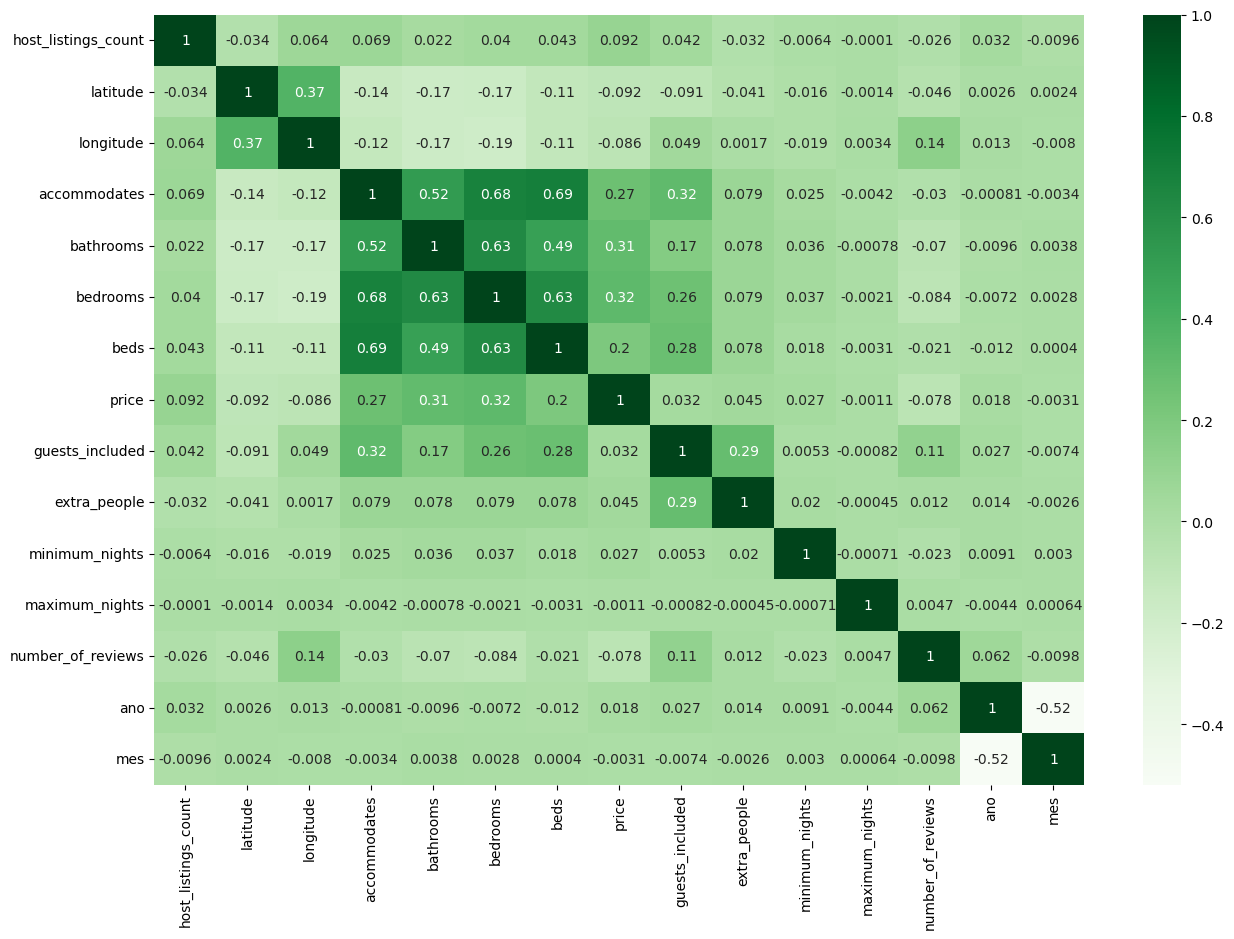

In [10]:
numeric_df = base_airbnb_df.select_dtypes(include=['float64', 'int64', 'float32'])
plt.figure(figsize=(15,10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Greens', annot_kws={"size": 10})


# Definição de Funções para Análise de Outiliers
vamos definir algumas funções para ajudar na análise de outiliers das colunas

In [11]:
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude

def excluir_outliers(df, nome_coluna):
    qtde_linhas = df.shape[0]
    
    lim_inf, lim_sup = limites(df[nome_coluna])
    
    df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]
    
    linhas_removidas = qtde_linhas - df.shape[0]
    
    return df, linhas_removidas
    

In [12]:
def diagrama_caixa(coluna):
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(15,5)
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna, ax=ax2)

def histograma(coluna):
    plt.figure(figsize=(10,5))
    sns.histplot(coluna, kde = True)

def grafico_barra(coluna):
    plt.figure(figsize=(10,5))
    ax = sns.barplot(x=coluna.value_counts().index, y=coluna.value_counts())
    ax.set_xlim(limites(coluna))
    

### Price


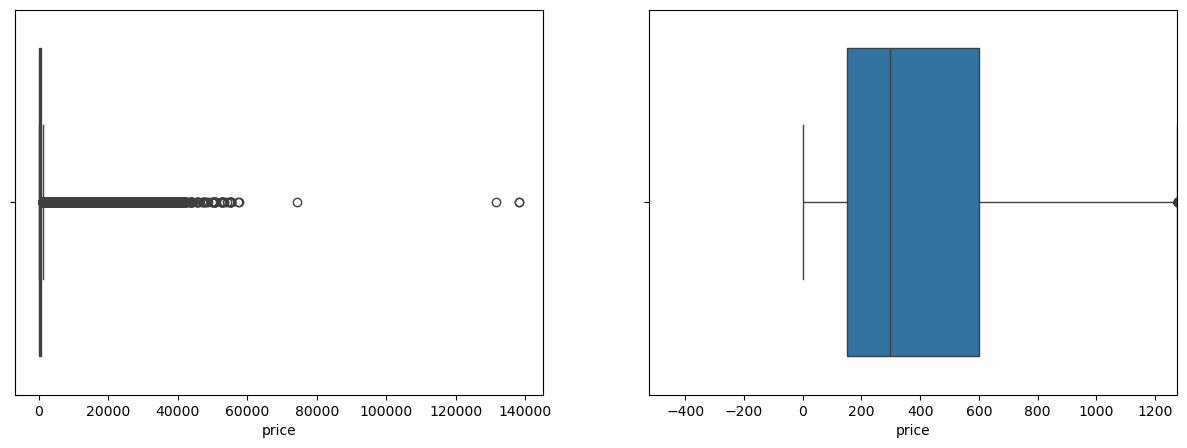

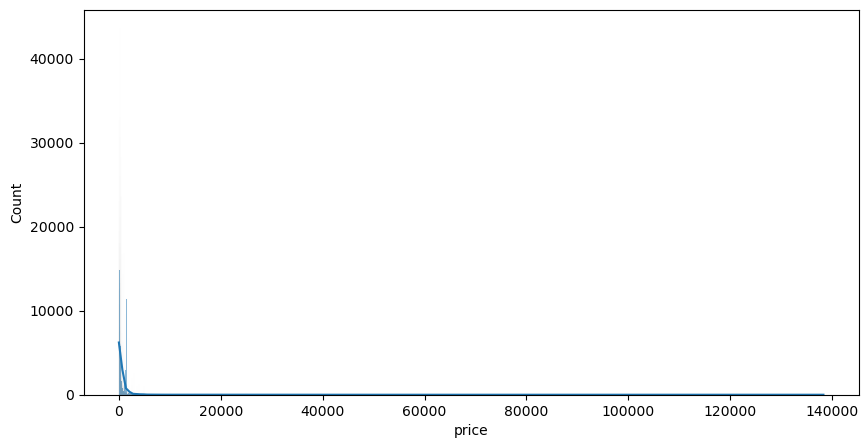

In [13]:
diagrama_caixa(base_airbnb_df['price'])
histograma(base_airbnb_df['price'])


como estamos construindo um modelo para imóveis comuns, acredito que os valores acima do limite superior serão apenas de apartamentos de altiíssimo luxo, que não é o nosso objetivo principal. Por isso podemos exluir esses outliers

In [14]:
#exclui outliers
base_airbnb_df, linhas_removidas = excluir_outliers(base_airbnb_df, 'price')
print('{} linhas removidas'.format(linhas_removidas))


87282 linhas removidas


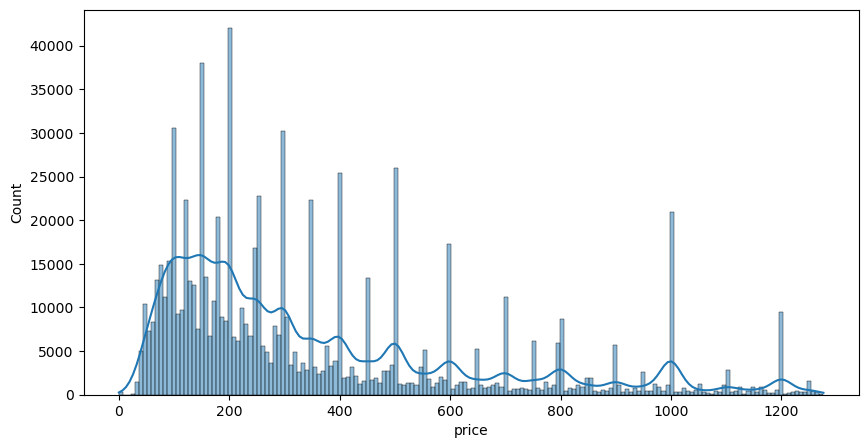

In [15]:
histograma(base_airbnb_df['price'])

### extra_people

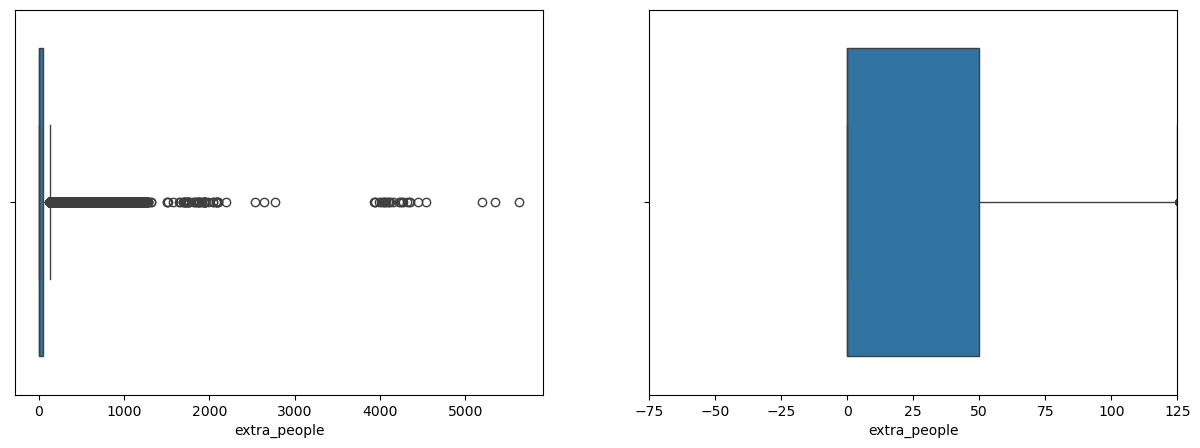

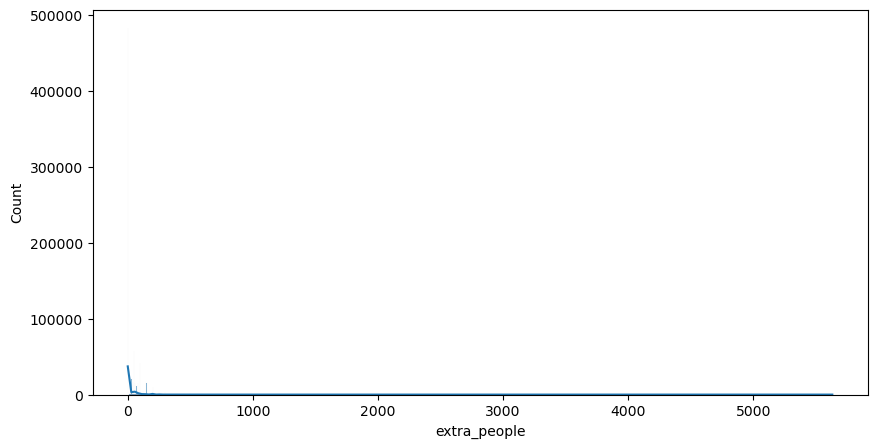

In [16]:
diagrama_caixa(base_airbnb_df['extra_people'])
histograma(base_airbnb_df['extra_people'])

In [17]:
#exclui outliers
base_airbnb_df, linhas_removidas = excluir_outliers(base_airbnb_df, 'extra_people')
print('{} linhas removidas'.format(linhas_removidas))

59194 linhas removidas


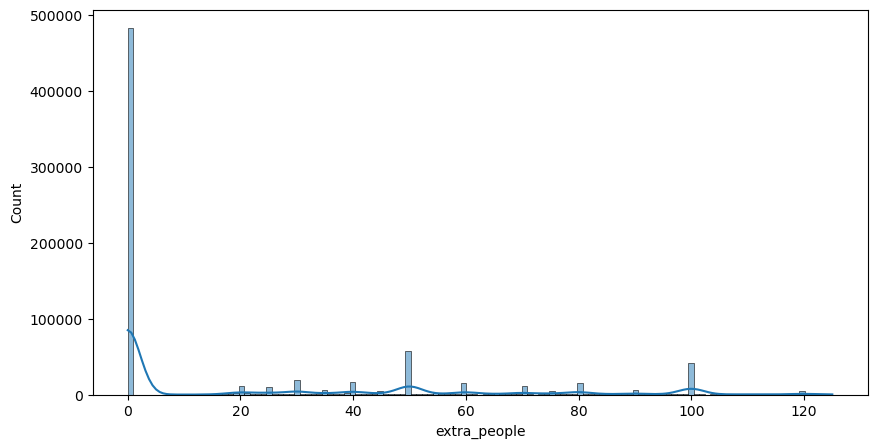

In [18]:
histograma(base_airbnb_df['extra_people'])

### host_listings_count 

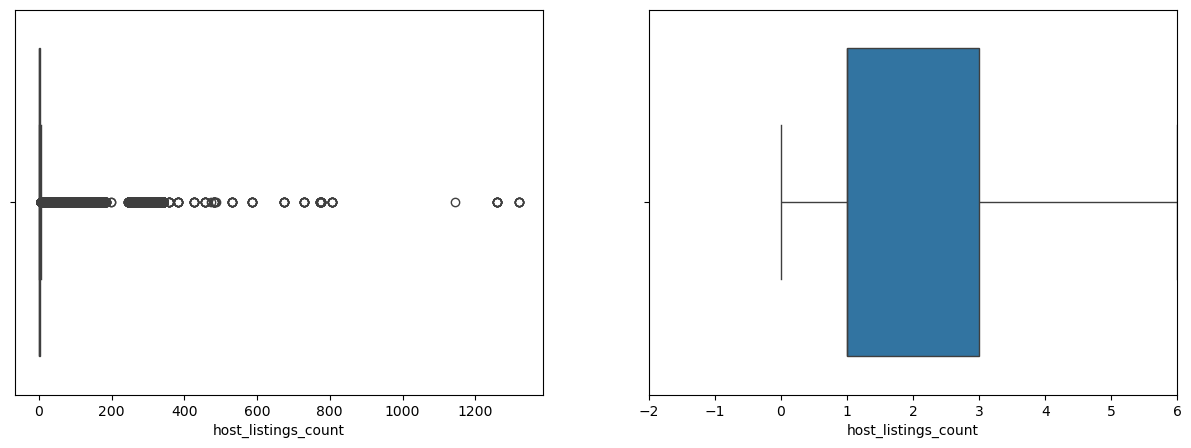

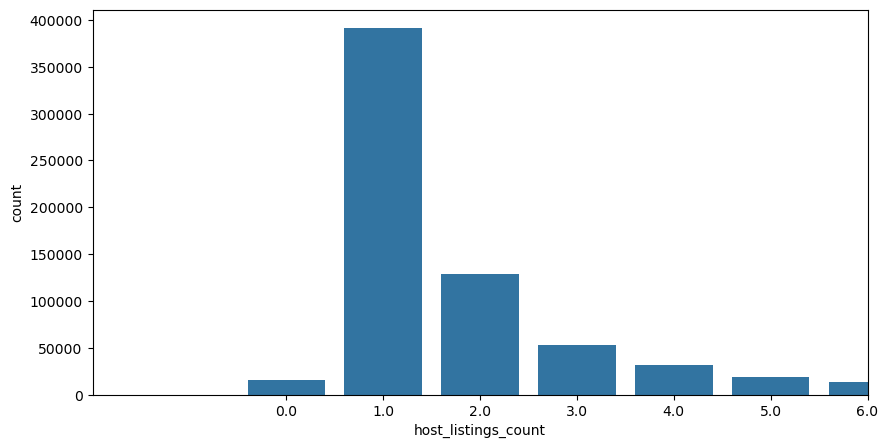

In [19]:
diagrama_caixa(base_airbnb_df['host_listings_count'])
grafico_barra(base_airbnb_df['host_listings_count'])

Podemos excluir os outliers, porque para o objetivo do nosso projeto hosts com mais de 6 imóveis no airbnb não é o publico alvo do projeto. (imaginoque sejam imobiliárias ou profissonais que gerenciam imóveis no airbnb)

In [20]:
#exclui outliers
base_airbnb_df, linhas_removidas = excluir_outliers(base_airbnb_df, 'host_listings_count')
print('{} linhas removidas'.format(linhas_removidas))

97723 linhas removidas


### accommodates

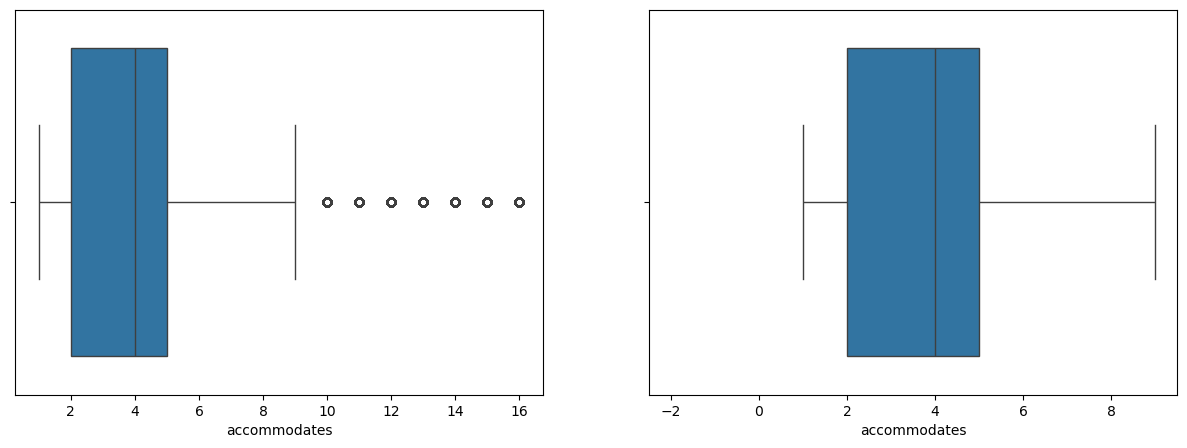

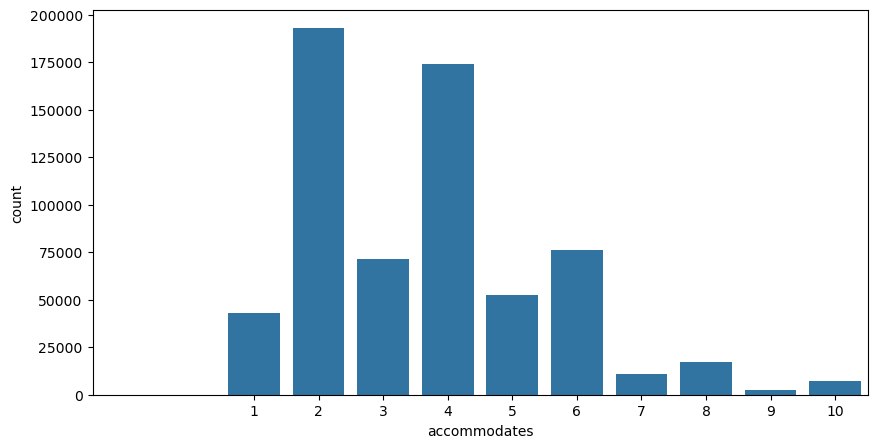

In [21]:
diagrama_caixa(base_airbnb_df['accommodates'])
grafico_barra(base_airbnb_df['accommodates'])

In [22]:
#exclui outliers
base_airbnb_df, linhas_removidas = excluir_outliers(base_airbnb_df, 'accommodates')
print('{} linhas removidas'.format(linhas_removidas))

13146 linhas removidas


### bathrooms 

<Axes: xlabel='bathrooms', ylabel='count'>

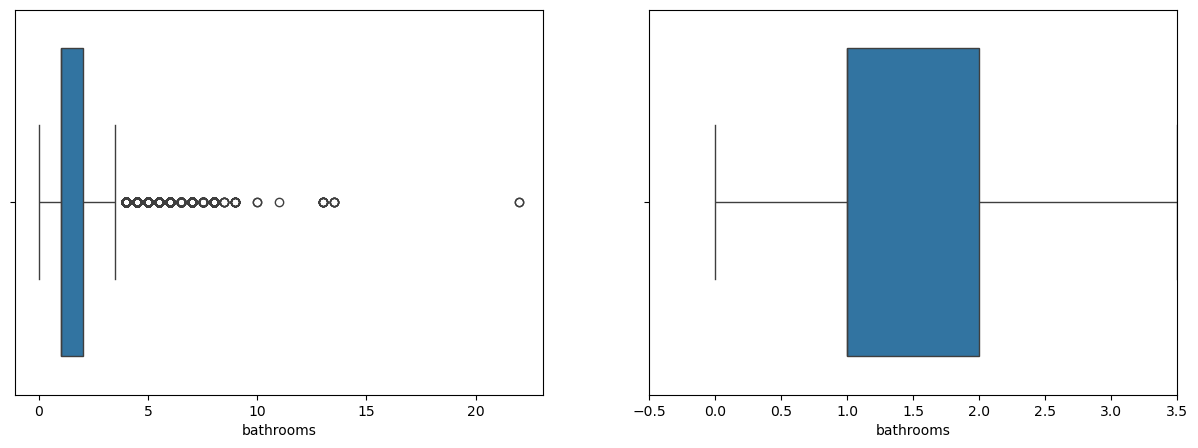

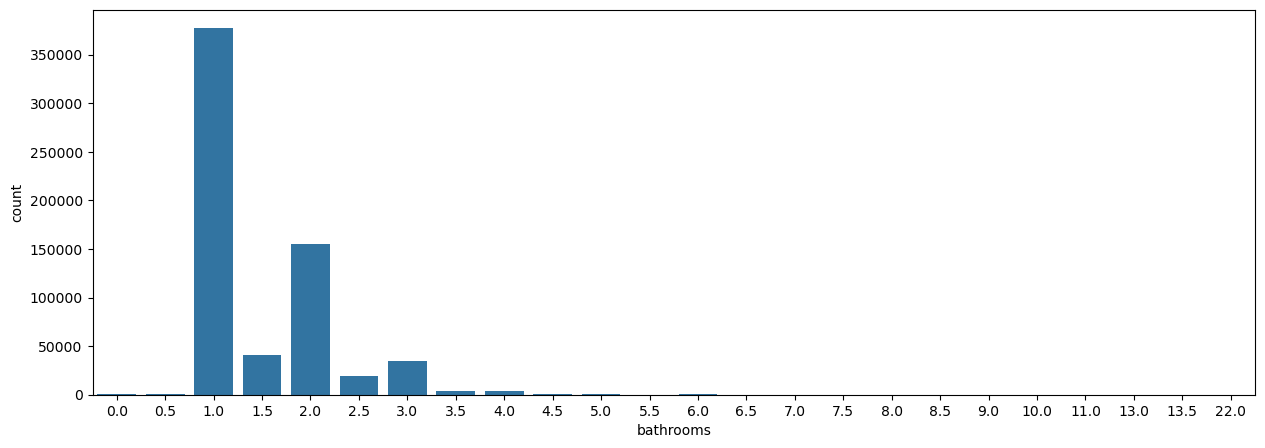

In [23]:
diagrama_caixa(base_airbnb_df['bathrooms'])
plt.figure(figsize=(15,5))
sns.barplot(x=base_airbnb_df['bathrooms'].value_counts().index,y=base_airbnb_df['bathrooms'].value_counts())

In [24]:
#exclui outliers
base_airbnb_df, linhas_removidas = excluir_outliers(base_airbnb_df, 'bathrooms')
print('{} linhas removidas'.format(linhas_removidas))

6894 linhas removidas


### bedrooms

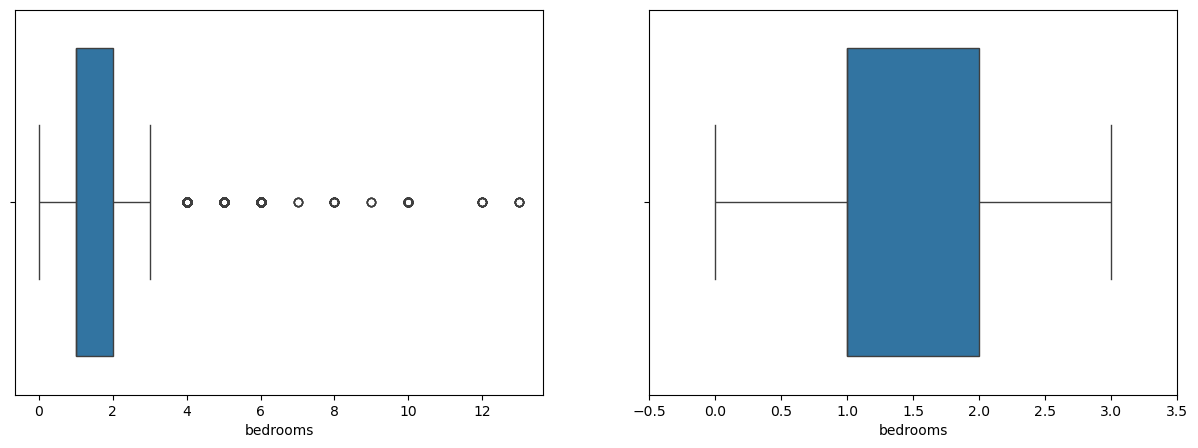

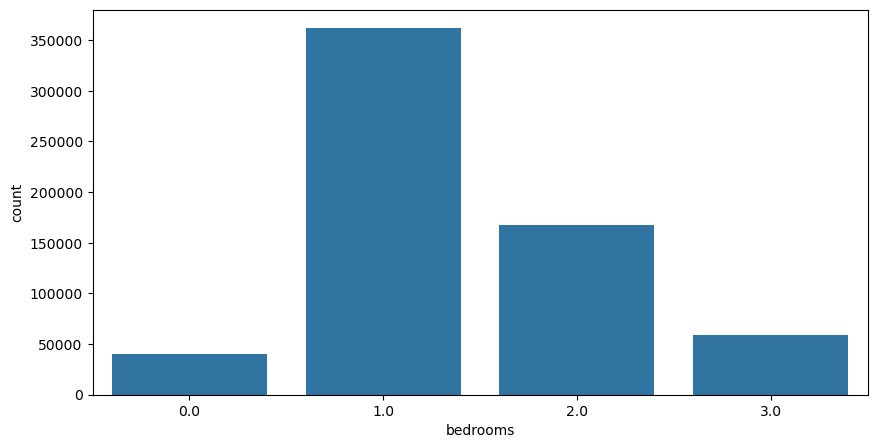

In [25]:
diagrama_caixa(base_airbnb_df['bedrooms'])
grafico_barra(base_airbnb_df['bedrooms'])

In [26]:
#exclui outliers
base_airbnb_df, linhas_removidas = excluir_outliers(base_airbnb_df, 'bedrooms')
print('{} linhas removidas'.format(linhas_removidas))

5482 linhas removidas


### beds     

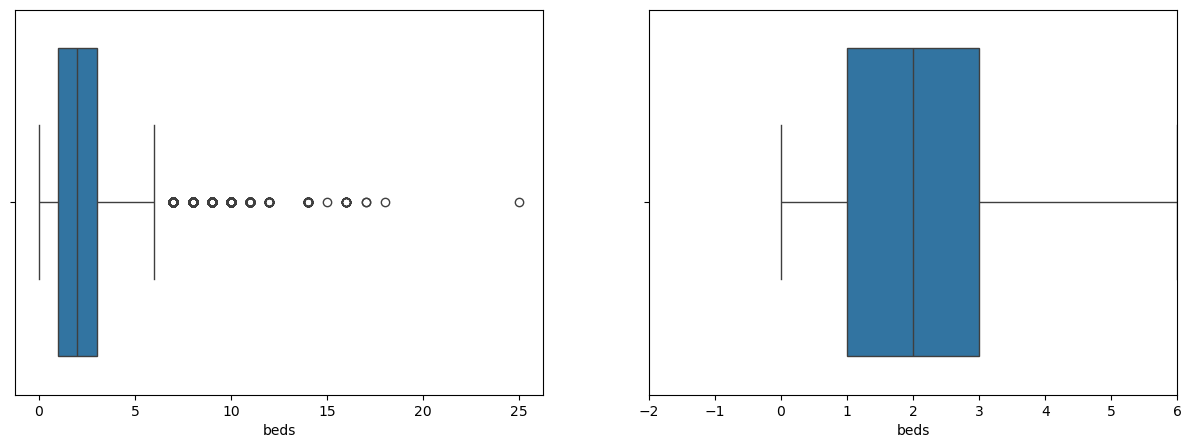

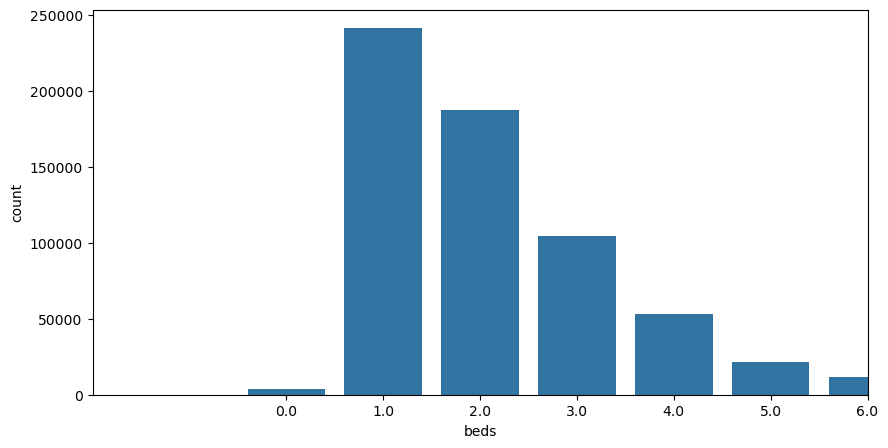

In [27]:
diagrama_caixa(base_airbnb_df['beds'])
grafico_barra(base_airbnb_df['beds'])

In [28]:
#exclui outliers
base_airbnb_df, linhas_removidas = excluir_outliers(base_airbnb_df, 'beds')
print('{} linhas removidas'.format(linhas_removidas))

5622 linhas removidas


### guests_included  

C:\Users\Samsung\AppData\Local\Temp\ipykernel_8516\3889939903.py:5: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax2.set_xlim(limites(coluna))
C:\Users\Samsung\AppData\Local\Temp\ipykernel_8516\3889939903.py:15: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(limites(coluna))


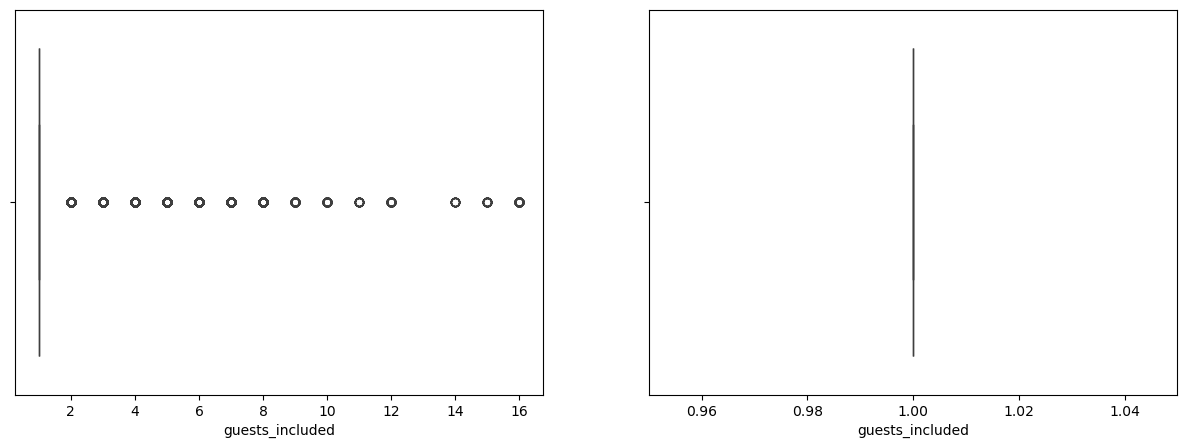

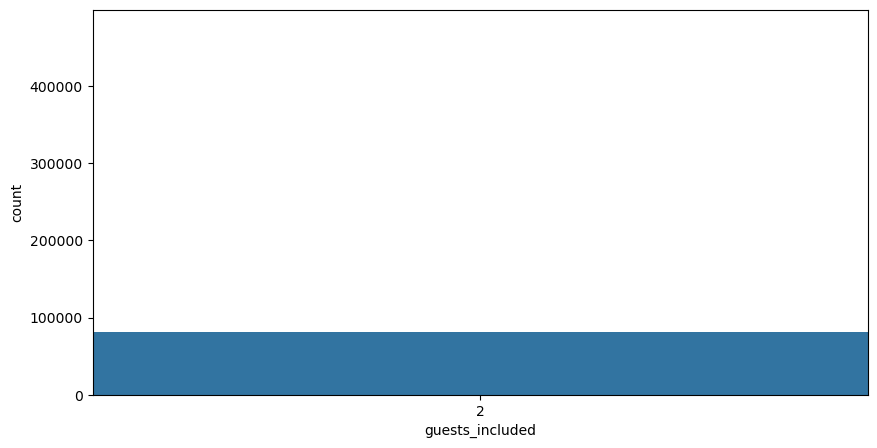

In [29]:
diagrama_caixa(base_airbnb_df['guests_included'])
grafico_barra(base_airbnb_df['guests_included'])

vamos remover essa feature da analise, aparentemente os dados não foram incluidos corretamente pelos usuários do airbnb. Isso pode levar o nosso modelo a considerar uma feature que na verdade não é essencial para a definição do preço. por isso, me parece melhor exlir a coluna da análise.


In [30]:
base_airbnb_df = base_airbnb_df.drop('guests_included',axis=1)
base_airbnb_df.shape

(622366, 22)

### minimum_nights

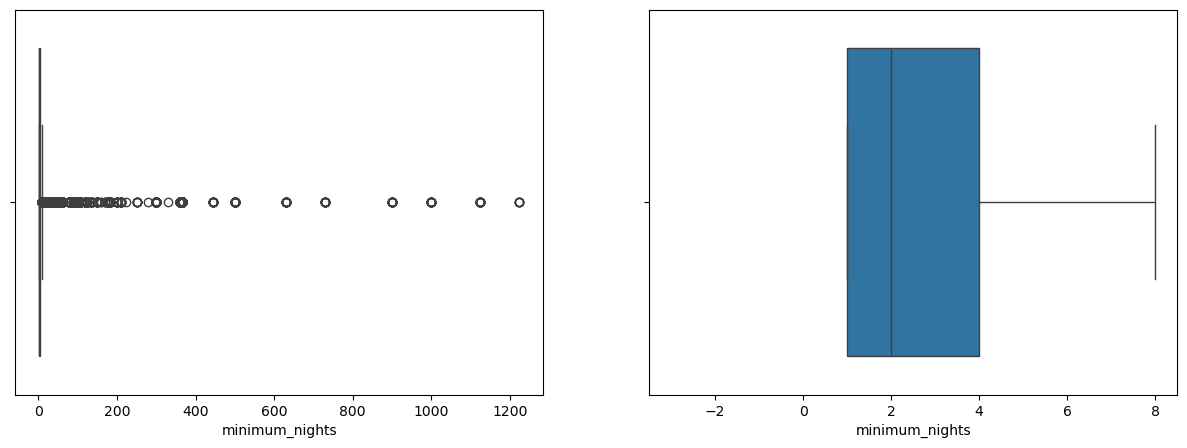

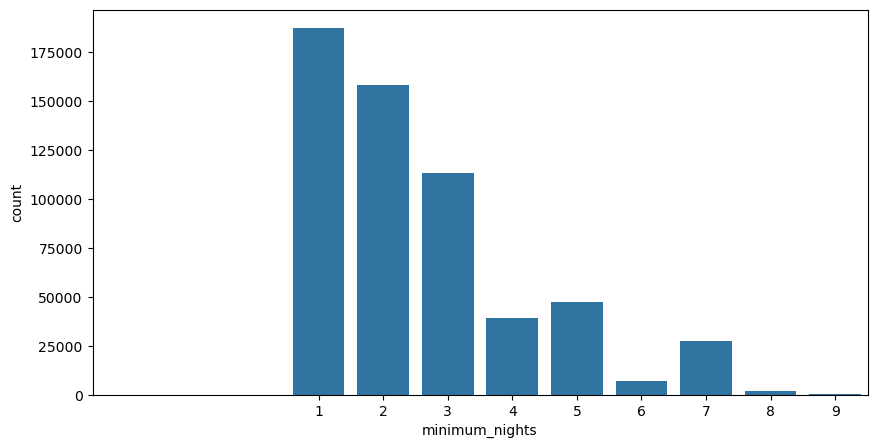

In [31]:
diagrama_caixa(base_airbnb_df['minimum_nights'])
grafico_barra(base_airbnb_df['minimum_nights'])

In [32]:
#exclui outliers
base_airbnb_df, linhas_removidas = excluir_outliers(base_airbnb_df, 'minimum_nights')
print('{} linhas removidas'.format(linhas_removidas))

40383 linhas removidas


### maximum_nights

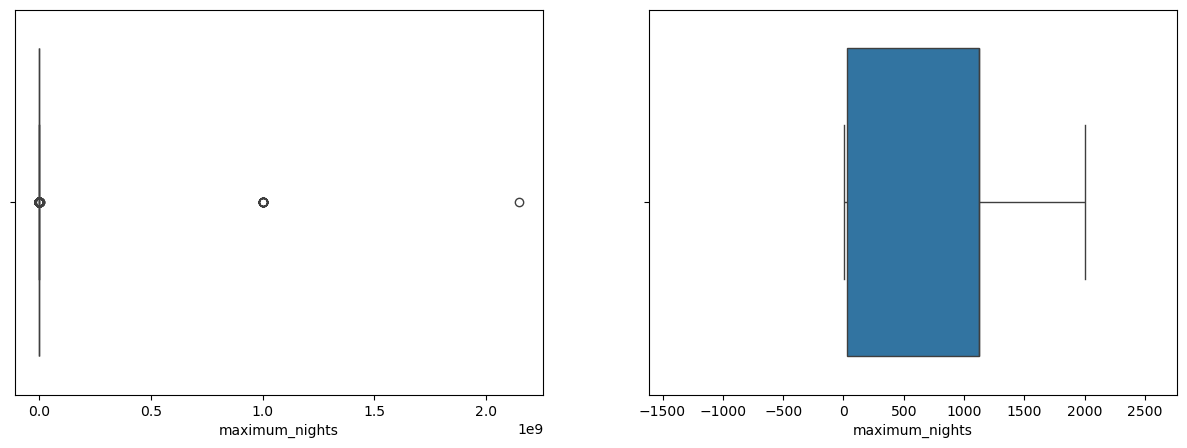

In [33]:
diagrama_caixa(base_airbnb_df['maximum_nights'])


Os valores de maximum_nights não é uma metrica muito boa para o nosso modelo, novamente ouve problema de inclusão dos dados, por isso vamos excluir essa coluna.

In [34]:
base_airbnb_df = base_airbnb_df.drop('maximum_nights',axis=1)
base_airbnb_df.shape

(581983, 21)

### number_of_reviews 

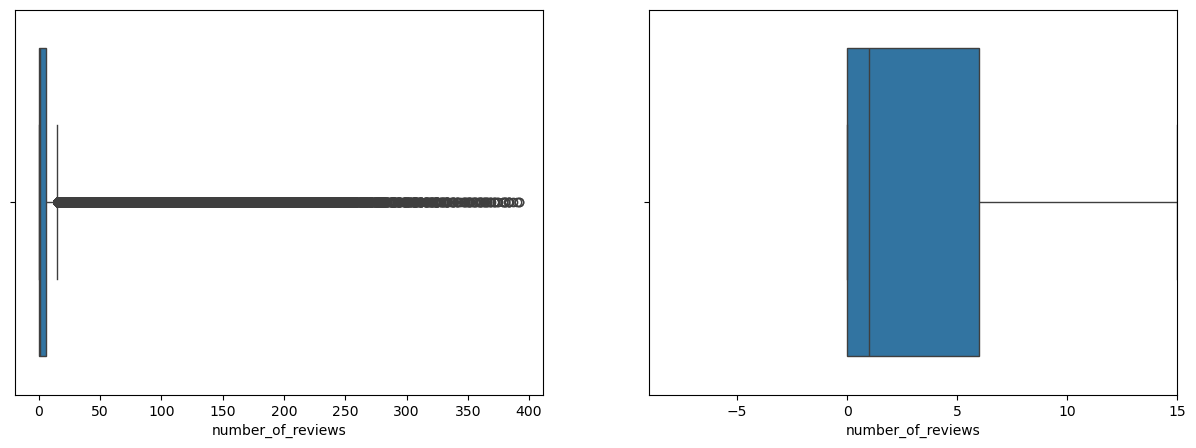

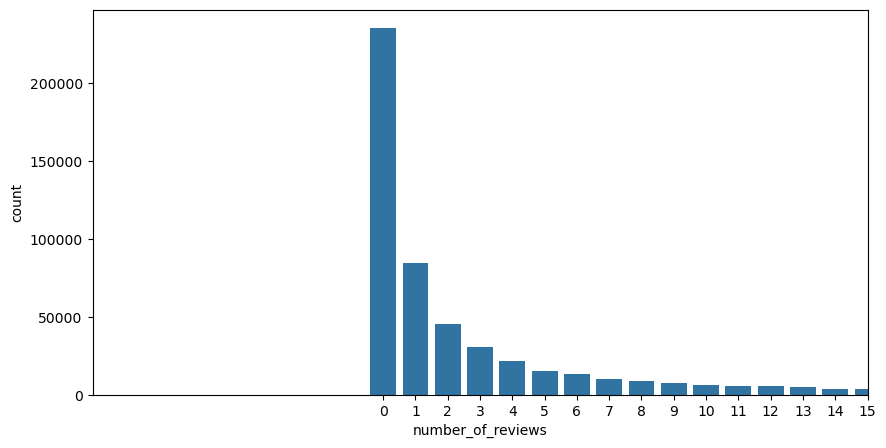

In [35]:
diagrama_caixa(base_airbnb_df['number_of_reviews'])
grafico_barra(base_airbnb_df['number_of_reviews'])

Analisando o fato que estamos criando um modelo para prever o valor que um usuário novo deve cobrar no airbnb, excluiremos a coluna number_of_reviews, pois ela é envieza ao que já possuem imóveis para locação.

In [36]:
base_airbnb_df = base_airbnb_df.drop('number_of_reviews',axis=1)
base_airbnb_df.shape

(581983, 20)

## Tratamento de Colunas de Texto

- property_type

In [37]:
print(base_airbnb_df['property_type'].value_counts())

property_type
Apartment                 458354
House                      51387
Condominium                26456
Serviced apartment         12671
Loft                       12352
Guest suite                 3621
Bed and breakfast           3472
Hostel                      2665
Guesthouse                  2155
Other                       1957
Villa                       1294
Townhouse                    969
Aparthotel                   693
Chalet                       481
Earth house                  468
Tiny house                   457
Boutique hotel               447
Hotel                        376
Casa particular (Cuba)       298
Cottage                      230
Bungalow                     207
Dorm                         185
Cabin                        141
Nature lodge                 124
Castle                        80
Treehouse                     76
Island                        54
Boat                          53
Hut                           40
Campsite                     

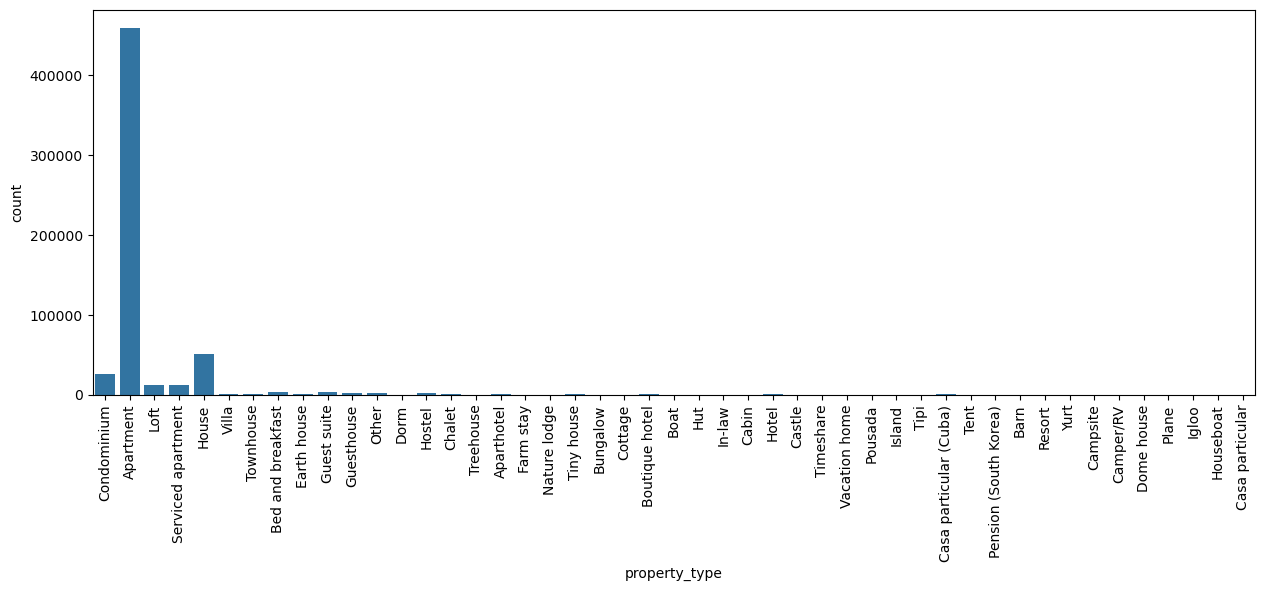

In [38]:
plt.figure(figsize=(15,5))
grafico = sns.countplot(x='property_type', data=base_airbnb_df)
grafico.tick_params(axis='x',rotation=90)

- como existem muito valores 'quebrados', vamos agrupar esses valore em uma só categoria (outros), afim de simplificar a leitura do modelo !!!reescrever ou excluir essa linha!!!

In [44]:
tabela_tipos_casa = base_airbnb_df['property_type'].value_counts()
colunas_agrupar = []

for tipo in tabela_tipos_casa.index:
    if tabela_tipos_casa[tipo] < 2000:
        colunas_agrupar.append(tipo)

for tipo in colunas_agrupar:
    base_airbnb_df.loc[base_airbnb_df['property_type']==tipo, 'property_type'] = 'Outros'

    
print(base_airbnb_df['property_type'].value_counts())

plt.figure(figsize=(15,5))
grafico = sns.countplot(x='property_type', data=base_airbnb_df)
grafico.tick_params(axis='x',rotation=90)

property_type
Apartment             458354
House                  51387
Condominium            26456
Serviced apartment     12671
Loft                   12352
Outros                  8850
Guest suite             3621
Bed and breakfast       3472
Hostel                  2665
Guesthouse              2155
Name: count, dtype: int64


- room_type

In [45]:
print(base_airbnb_df['room_type'].value_counts())

plt.figure(figsize=(15,5))
sns.countplot(x='room_type', data=base_airbnb_df)

- bed_type

bed_type
Real Bed         570643
Pull-out Sofa      8055
Futon              1634
Airbed             1155
Couch               496
Name: count, dtype: int64
bed_type
Real Bed    570643
Outros       11340
Name: count, dtype: int64


<Axes: xlabel='bed_type', ylabel='count'>

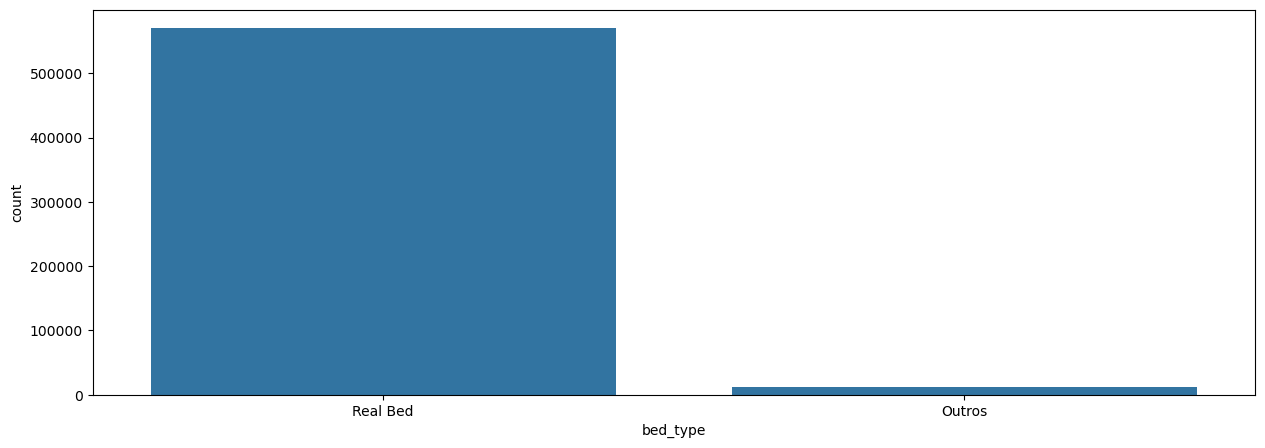

In [59]:
print(base_airbnb_df['bed_type'].value_counts())

plt.figure(figsize=(15,5))
sns.countplot(x='bed_type', data=base_airbnb_df)


# agrupando categorias de bed_type
tabela_bed = base_airbnb_df['bed_type'].value_counts()
colunas_agrupar = []

for tipo in tabela_bed.index:
    if tabela_bed[tipo] < 10000:
        colunas_agrupar.append(tipo)

for tipo in colunas_agrupar:
    base_airbnb_df.loc[base_airbnb_df['bed_type']==tipo, 'bed_type'] = 'Outros'

    
print(base_airbnb_df['bed_type'].value_counts())

plt.figure(figsize=(15,5))
sns.countplot(x='bed_type', data=base_airbnb_df)

- cancellation_policy

cancellation_policy
flexible                       258096
strict_14_with_grace_period    200743
moderate                       113281
strict                           9696
super_strict_60                   135
super_strict_30                    32
Name: count, dtype: int64
cancellation_policy
flexible                       258096
strict_14_with_grace_period    200743
moderate                       113281
strict                           9863
Name: count, dtype: int64


<Axes: xlabel='cancellation_policy', ylabel='count'>

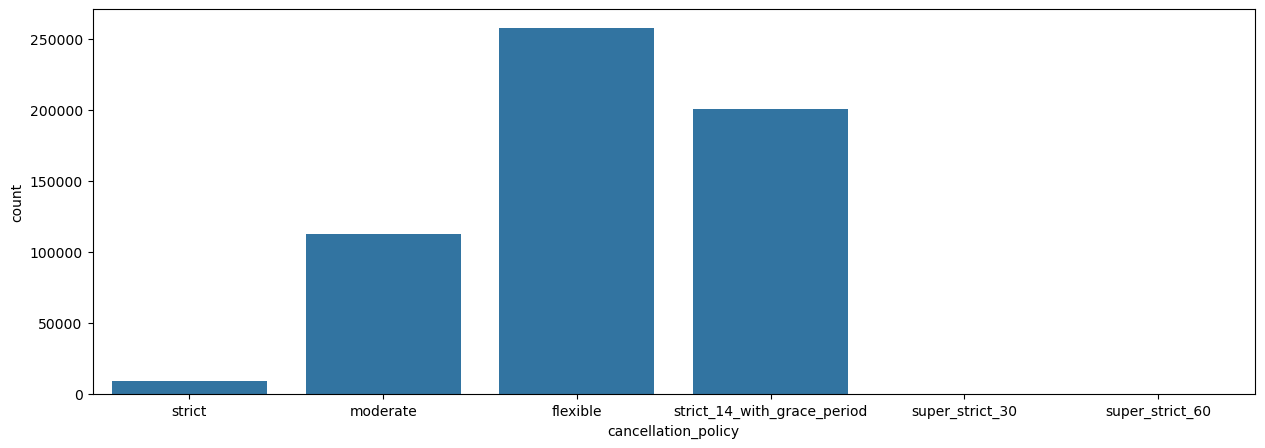

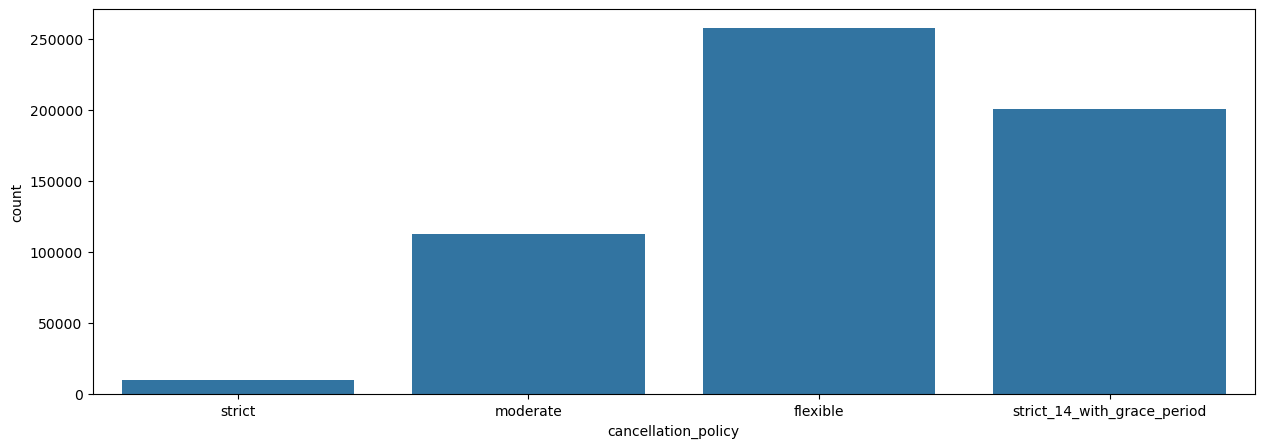

In [56]:
print(base_airbnb_df['cancellation_policy'].value_counts())

plt.figure(figsize=(15,5))
sns.countplot(x='cancellation_policy', data=base_airbnb_df)

# agrupando categorias de cancellation_pollicy
tabela_cancellation = base_airbnb_df['cancellation_policy'].value_counts()
colunas_agrupar = []

for tipo in tabela_cancellation.index:
    if tabela_cancellation[tipo] < 10000:
        colunas_agrupar.append(tipo)

for tipo in colunas_agrupar:
    base_airbnb_df.loc[base_airbnb_df['cancellation_policy']==tipo, 'cancellation_policy'] = 'strict'

    
print(base_airbnb_df['cancellation_policy'].value_counts())

plt.figure(figsize=(15,5))
sns.countplot(x='cancellation_policy', data=base_airbnb_df)



- amenities
  como temos uma diversidade muito grande de amenities e às vezes, as mesmas amenities podem ser escritas de forma diferente, vamos avaliar a quantidade de amenities como o parâmetro para o nosso modelo.

In [66]:
print(base_airbnb_df['amenities'].iloc[0])
print(len(base_airbnb_df['amenities'].iloc[0].split(',')))

base_airbnb_df['n_amenities'] = base_airbnb_df['amenities'].str.split(',').apply(len)

{TV,"Cable TV",Internet,Wifi,"Air conditioning",Kitchen,"Paid parking off premises","Smoking allowed",Doorman,Elevator,"Hot tub","Family/kid friendly","Suitable for events",Essentials,"24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Self check-in","Front desk/doorperson","Private entrance","Hot water","Bed linens","Luggage dropoff allowed"}
25


In [67]:
base_airbnb_df = base_airbnb_df.drop('amenities',axis=1)
base_airbnb_df.shape

(581983, 20)

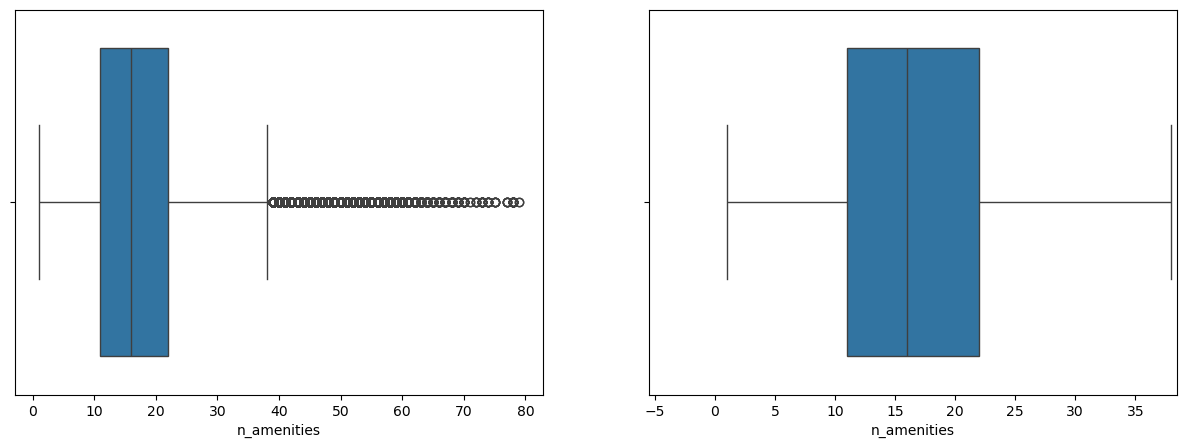

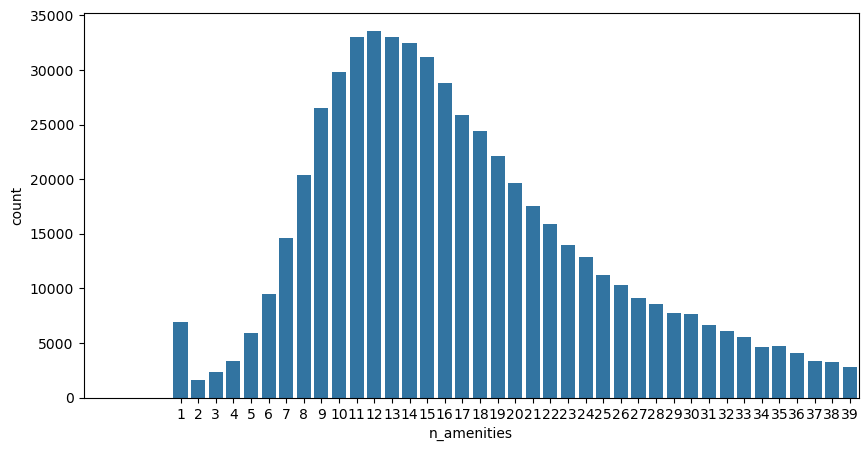

In [69]:
diagrama_caixa(base_airbnb_df['n_amenities'])
grafico_barra(base_airbnb_df['n_amenities'])

In [70]:
base_airbnb_df, linhas_removidas = excluir_outliers(base_airbnb_df, 'n_amenities')
print('{} linhas removidas'.format(linhas_removidas))

24343 linhas removidas


## Visualização de Mapa das Propriedades

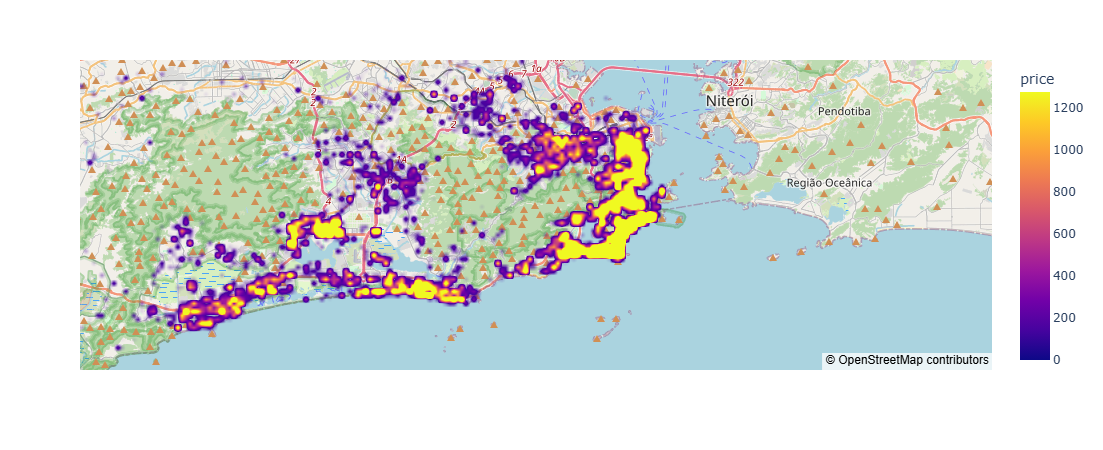

In [77]:
amostra = base_airbnb_df.sample(n=50000)

centro_mapa = {'lat':amostra.latitude.mean(), 'lon':amostra.longitude.mean()}

mapa = px.density_mapbox(amostra, lat='latitude', lon='longitude', z='price', radius=2.5,
                        center=centro_mapa, zoom=10,
                        mapbox_style='open-street-map')
mapa.show()

# Enconding
Precisamos ajustar as features para facilitar o trabalho do modelo futuro (features de categoria, true e false, etc.)
- Features de Valores True ou False, vamos substituir True por 1 e False por 0
- Features de Categorias (features em que os valores da coluna são textos) vamos utilizar o método de enconding de variáveis dummies.

In [80]:
colunas_tf = ['host_is_superhost', 'instant_bookable', 'is_business_travel_ready']

base_airbnb_cod = base_airbnb_df.copy()

for coluna in colunas_tf:
    base_airbnb_cod.loc[base_airbnb_cod[coluna] == 't', coluna] = 1
    base_airbnb_cod.loc[base_airbnb_cod[coluna] == 'f', coluna] = 0


host_is_superhost                         1
host_listings_count                     2.0
latitude                         -22.965919
longitude                        -43.178962
property_type                   Condominium
room_type                   Entire home/apt
accommodates                              5
bathrooms                               1.0
bedrooms                                2.0
beds                                    2.0
bed_type                           Real Bed
price                                 270.0
extra_people                           51.0
minimum_nights                            4
instant_bookable                          1
is_business_travel_ready                  0
cancellation_policy                  strict
ano                                    2018
mes                                       4
n_amenities                              25
Name: 1, dtype: object


In [87]:
colunas_categorias = ['property_type', 'room_type','bed_type', 'cancellation_policy' ]

# Gerar as dummies
base_airbnb_cod = pd.get_dummies(data=base_airbnb_cod, columns=colunas_categorias)

# Converter True/False para 0/1
base_airbnb_cod = base_airbnb_cod.astype(int)

display(base_airbnb_cod.head())

host_is_superhost  host_listings_count  latitude  longitude  accommodates  \
1                  1                    2       -22        -43             5   
3                  0                    3       -22        -43             3   
4                  1                    1       -22        -43             3   
5                  1                    1       -22        -43             3   
6                  1                    1       -22        -43             2   

   bathrooms  bedrooms  beds  price  extra_people  ...  \
1          1         2     2    270            51  ...   
3          1         1     2    161            45  ...   
4          1         1     2    222            68  ...   
5          1         1     2    308            86  ...   
6          1         1     2    219            80  ...   

   room_type_Entire home/apt  room_type_Hotel room  room_type_Private room  \
1                          1                     0                       0   
3                          1                     0                       0   
4                          1                     0                       0   
5                          1                     0                       0   
6                          1                     0                       0   

   room_type_Shared room  bed_type_Outros  bed_type_Real Bed  \
1                      0                0                  1   
3                      0                0                  1   
4                      0                0                  1   
5                      0                0                  1   
6                      0                0                  1   

   cancellation_policy_flexible  cancellation_policy_moderate  \
1                             0                             0   
3                             0                             0   
4                             0                             0   
5                             0                             0   
6                             0                             0   

   cancellation_policy_strict  cancellation_policy_strict_14_with_grace_period  
1                           1                                                0  
3                           1                                                0  
4                           1                                                0  
5                           1                                                0  
6                           1                                                0  

[5 rows x 36 columns]